In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("../csv/Sales Records.csv")
df.head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0


## 복습
1. Order Date의 값으 시계열 변경
2. Order week 컬럼을 생성하여 요일데이터 저장
3. 국가, 요일별 Total Profit의 평균, 합계를 구하시오

In [5]:
df["Order Date"] = pd.to_datetime(df["Order Date"],format="%M/%d/%Y")

In [14]:
df["Order week"] = df["Order Date"].dt.weekday 
## 이름을 명목화 하기 위해서는 dt.day_name()

In [17]:
df.groupby(["Country","Order week"])["Total Profit"].agg(["mean","sum"])

mean         sum
Country     Order week                           
Afghanistan 0           308335.367000  3083353.67
            1           422629.800000  3803668.20
            2           429998.215000  4299982.15
            3           319340.290000  1277361.16
            4           387604.887143  2713234.21
...                               ...         ...
Zimbabwe    2           296360.232857  2074521.63
            3           537381.285000  6448575.42
            4           300734.464286  2105141.25
            5           245798.790000  2703786.69
            6           369913.806667  3329224.26

[1294 rows x 2 columns]

## corona
1. 파일로드
2. creatDt를 시계열데이터 변경
3. 요일 컬럼 생성 요일 대입
4. createDt를 기준으로 오름차순 정렬
5. 일일 확진자 컬럼 생성 decideCnt의 차이를 대입
6. 요일별 일일 확진자의 평균값 출력
7. 요일별 일일 확진자를 시각화(바형 그래프)

In [21]:
corona = pd.read_csv("../221214/corona.csv")
corona.head(1)

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-12-14 00:42:41.0,31174,27925572,1099,20221214,00:00,NaN,NaN,NaN


In [22]:
corona["createDt"] = pd.to_datetime(corona["createDt"],format="%Y-%m-%d")

In [49]:
corona["weekday"] = corona["createDt"].dt.day_name()

In [50]:
corona.sort_values("createDt",inplace=True)

In [51]:
corona["일일 확진자"] = corona["decideCnt"].diff()

In [64]:
week_corona = corona.groupby("weekday")["일일 확진자"].mean() ## 스리즈 형태
# corona.groupby("weekday")[["일일 확진자"]].mean() ## 데이터프레임
# corona.groupby("weekday").agg(['mean'])['일일 확진자']## 데이터프레임
 ## 두 데이터프레임의 출려되는 column의 형태가 다름

In [65]:
import matplotlib.pyplot as plt

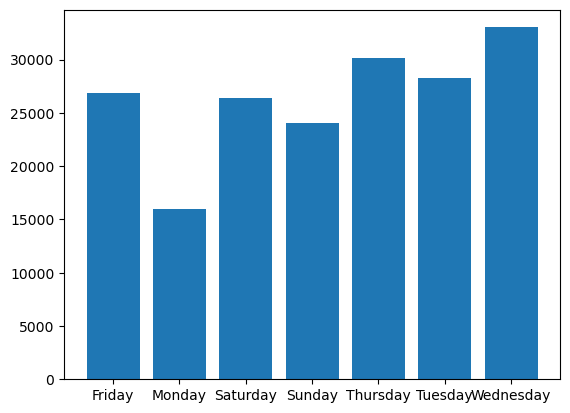

In [66]:
x = week_corona.index
y = week_corona.values
plt.bar(x,y)
plt.show()